# Petfinder dog analysis

Study:
* The data analysis explores the population of adoptable dogs advertised on Petfinder in Georgia,  specifically if differences in certain parameters have a relationship with the average number of days a dog spends on Petfinder. 
* Parameters analyzed in the analysis include size, gender, age, and location.

Findings:
* The results of the analysis indicated the following:
    * Larger dogs spend more time on average on Petfinder than smaller dogs.
    * Female dogs spend more time on average on Petfinder than male dogs.
    * Older dogs spend more time on average on Petfinder than younger dogs.
    * Dogs located outside the perimeter of Atlanta spend more time on average on Petfinder than dogs located inside the perimeter of Atlanta.

Observations:
* The analysis used average of all dogs in the categorical grouping. No outliers were excluded from the study, and sample sizes were not necessarily the same size. 
* The observed median values for the gender and location parameters were much closer than the average (mean) values tested in this study. This suggests that outliers may have a large effect on calculating the mean values. A further study that drops outlier samples, or extreme outliers, could be performed to further evaluate these parameters' effects on how long dogs are available on Petfinder before adoption.

Implications of the study:
* Petfinder could use this analysis to focus efforts on finding compatible homes for dogs.
    * Efforts could include targeted marketing strategies for dogs that generally spend a longer average time on Petfinder. 
    * Petfinder could use the study as baseline data to then measure and improve how long their dogs spend on Petfinder.

* Future studies based on organization could also help optimize resource sharing between the groups to ultimately improve overall dog adoption rate.

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
# read in CSV
dogs_df = pd.read_csv('dogs_clean.csv')

In [4]:
# preview dataframe
dogs_df.head()

,Pet ID,Name,Status,Publish Date,Organization ID,City,State,Breed,Age,Gender,Size,Spayed or Neutered,House Trained,Special Needs,Shots Current,Date Collected,Days Available
0,54858447,Boon,adoptable,2022-03-04,GA862,Athens,GA,Mixed Breed,Adult,Male,Large,True,False,False,False,2022-04-26,53
1,54802620,Casper,adoptable,2022-03-01,GA99,Macon,GA,Mixed Breed,Young,Male,Medium,True,False,False,False,2022-04-26,56
2,55368350,Giacomo (In Foster),adoptable,2022-04-22,GA335,Atlanta,GA,Mixed Breed,Young,Male,Small,True,False,False,False,2022-04-26,4
3,55179362,Loki,adoptable,2022-04-01,GA340,Tucker,GA,Labrador Retriever,Adult,Male,Large,True,True,True,True,2022-04-26,25
4,55331643,Queen,adoptable,2022-04-18,GA217,Atlanta,GA,Pit Bull Terrier,Young,Female,Medium,False,False,False,False,2022-04-26,8


# Size Analysis
Q1: Do large and x-large dogs spend more average time on Petfinder than small and medium dogs in Georgia?
* H1_o: Large and x-large dogs spend the same of time on average on Petfinder as small and medium dogs.
* H1_a1: Large and x-large dogs spend more average time on Petfinder than small and medium dogs.
* H1_a2: Large and x-large dogs spend less average time on Petfinder than small and medium dogs.

In [5]:
#Look at distribution of dog sizes
dogs_df['Size'].value_counts()

Large          371
Medium         358
Small           92
Extra Large     11
Name: Size, dtype: int64

In [6]:
#Using the aggregation method, look at average 
initial_stats = dogs_df.groupby(['Size'])['Days Available'].agg(['mean', 'median', 'var', 'std','sem'])
initial_stats['mean']

Size
Extra Large    653.272727
Large          120.811321
Medium         128.438547
Small           93.750000
Name: mean, dtype: float64

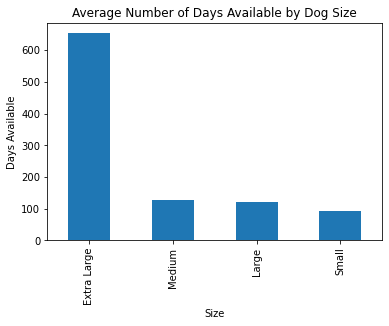

In [7]:
#Generate a bar plot showing the days vs avg size
total_days = dogs_df.groupby(['Size'])['Days Available'].mean()
bar_plot = total_days.sort_values(ascending=False).plot(kind='bar')

# Set the xlabel, ylabel, and title
bar_plot.set_ylabel("Days Available")
bar_plot.set_title("Average Number of Days Available by Dog Size")

plt.savefig("Figures/bar_dog_size_all.png")
plt.show()

In [8]:
#Generate a box plot showing the days vs size
avg_days = []

size_list = ['Extra Large', 'Large','Medium','Small']

for each in size_list:
    #use loc to find the rows corresponding to each
    days = dogs_df.loc[dogs_df['Size']==each]['Days Available']
    avg_days.append(days)
    print(each)

Extra Large
Large
Medium
Small


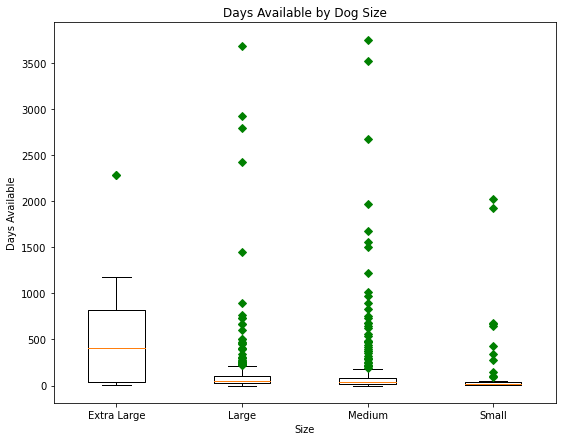

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Days Available by Dog Size')
ax.set_xlabel('Size')
ax.set_ylabel('Days Available')
ax.boxplot(avg_days,notch=0,sym='gD')
plt.xticks([1,2,3,4],size_list)

# Save the figure

plt.savefig("Figures/box_dog_size_all.png")
plt.show()

There are only eleven dogs that are considered extra-large. Considering this group on its own could skew the data. Therefore, team grouped dogs as Larger (Extra Large and Large) vs Smaller (Medium and Small) to get more comparable sample sizes of each group. 

In [10]:
#There are only a small number of "Extra Large" dogs. 
#This small sample size could be skewing the data.
#Modify grouping lists to be either big (Extra large and Large) or small (Medium and Small).

#create a new dataframe for dogs_df
dogs_df2 = dogs_df

size_group_df ={
    "Extra Large":"Big",
    "Large": "Big",
    "Medium":"Small",
    "Small":"Small"
}

dogs_df2['Group']=dogs_df2['Size'].map(size_group_df)
dogs_df2

,Pet ID,Name,Status,Publish Date,Organization ID,City,State,Breed,Age,Gender,Size,Spayed or Neutered,House Trained,Special Needs,Shots Current,Date Collected,Days Available,Group
0,54858447,Boon,adoptable,2022-03-04,GA862,Athens,GA,Mixed Breed,Adult,Male,Large,True,False,False,False,2022-04-26,53,Big
1,54802620,Casper,adoptable,2022-03-01,GA99,Macon,GA,Mixed Breed,Young,Male,Medium,True,False,False,False,2022-04-26,56,Small
2,55368350,Giacomo (In Foster),adoptable,2022-04-22,GA335,Atlanta,GA,Mixed Breed,Young,Male,Small,True,False,False,False,2022-04-26,4,Small
3,55179362,Loki,adoptable,2022-04-01,GA340,Tucker,GA,Labrador Retriever,Adult,Male,Large,True,True,True,True,2022-04-26,25,Big
4,55331643,Queen,adoptable,2022-04-18,GA217,Atlanta,GA,Pit Bull Terrier,Young,Female,Medium,False,False,False,False,2022-04-26,8,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,54255555,Aphrodite- In Foster,adoptable,2022-01-16,GA423,Chamblee,GA,Mixed Breed,Adult,Female,Large,True,False,False,False,2022-04-26,100,Big
828,55192469,Stuart Wiggle,adoptable,2022-04-03,GA217,Atlanta,GA,Black Mouth Cur,Baby,Male,Small,True,False,False,False,2022-04-26,23,Small
829,55304165,Chica,adoptable,2022-04-14,GA862,Athens,GA,Mixed Breed,Young,Female,Medium,False,False,False,False,2022-04-26,12,Small
830,55304095,Lana,adoptable,2022-04-14,GA862,Athens,GA,Mixed Breed,Adult,Female,Large,False,False,False,False,2022-04-26,12,Big


In [11]:
#Using the aggregation method, look at average with new grouping 
new_stats = dogs_df2.groupby(['Group'])['Days Available'].agg(['mean', 'median', 'var', 'std','sem'])
new_stats

,mean,median,var,std,sem
Group,,,,,
Big,136.143979,52.5,135117.351919,367.583122,18.807189
Small,121.346667,29.0,133510.382895,365.390726,17.224684


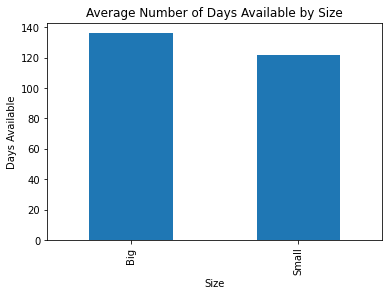

In [12]:
#Generate a bar plot showing the days vs avg size
total_days = dogs_df2.groupby(['Group'])['Days Available'].mean()
bar_plot = total_days.sort_values(ascending=False).plot(kind='bar')

# Set the xlabel, ylabel, and title
bar_plot.set_ylabel("Days Available")
bar_plot.set_xlabel("Size")
bar_plot.set_title("Average Number of Days Available by Size")

plt.savefig("Figures/bar_dog_size_grouped.png")
plt.show()

In [13]:
#Generate a box plot showing the days vs size
avg_days2 = []

size_list2 = ['Big','Small']

for each in size_list2:
    #use loc to find the rows corresponding to each
    days = dogs_df2.loc[dogs_df2['Group']==each]['Days Available']
    avg_days2.append(days)
    print(each)

Big
Small


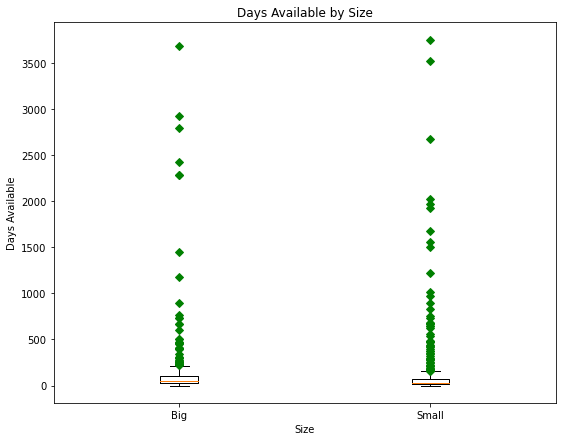

In [14]:
# Generate a box plot
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Days Available by Size')
ax.set_xlabel('Size')
ax.set_ylabel('Days Available')
ax.boxplot(avg_days2,notch=0,sym='gD')
plt.xticks([1,2],size_list2)

# Save the figure

plt.savefig("Figures/box_dog_size_grouped.png")
plt.show()

# Size Results
* Larger dogs, grouped as X-large or Large dogs, spend on average 136 days on Petfinder. 
* Smaller dogs, grouped as medium or small dogs, spend on average 121 days on Petfinder.
* We reject the null hypothesis in favor of alternative hypothesis 1, that larger dogs spend more time on average on Petfinder than smaller dogs.
* There were 382 large dogs and 450 small dogs considered in this data analysis.

# Gender Analysis
Q2: Do female dogs spend more time on average on Petfinder than male dogs?
* H2_o: Male dogs spend on average the same amount of time on Petfinder as female dogs.
* H2_a1: Male dogs spend more time on average on Petfinder than female dogs.
* H2_a2: Male dogs spend less time on average on Petfinder than female dogs.

In [15]:
#Look at distribution of dog genders
dogs_df['Gender'].value_counts()

Male      459
Female    373
Name: Gender, dtype: int64

In [16]:
#Using the aggregation method, look at average 
initial_stats = dogs_df.groupby(['Gender'])['Days Available'].agg(['mean', 'median', 'var', 'std','sem'])
initial_stats

,mean,median,var,std,sem
Gender,,,,,
Female,146.659517,35.0,184237.278921,429.228702,22.224620
Male,113.091503,38.0,93237.930473,305.348867,14.252465


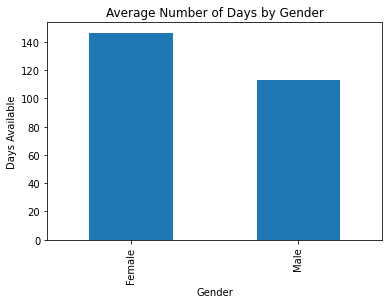

In [17]:
#Generate a bar plot showing the days vs avg size
total_days = dogs_df.groupby(['Gender'])['Days Available'].mean()
bar_plot = total_days.sort_values(ascending=False).plot(kind='bar')

# Set the xlabel, ylabel, and title
bar_plot.set_ylabel("Days Available")
bar_plot.set_title("Average Number of Days by Gender")

plt.savefig("Figures/bar_dog_gender.png")
plt.show()

In [18]:
#Generate a box plot showing the days vs size
avg_days_gender = []

size_list_gender = ['Female','Male']

for each in size_list_gender:
    #use loc to find the rows corresponding to each
    days = dogs_df.loc[dogs_df['Gender']==each]['Days Available']
    avg_days_gender.append(days)
    print(each)

Female
Male


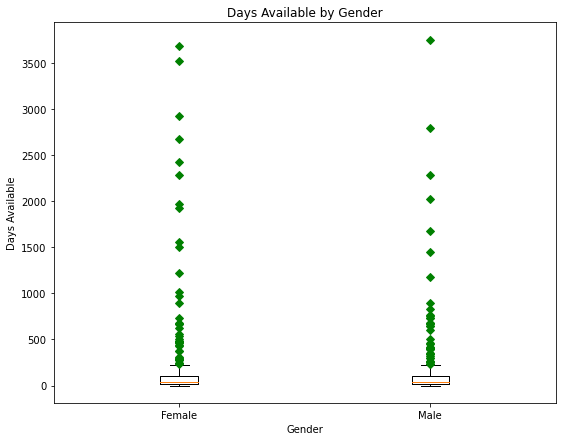

In [19]:
# Generate a box plot
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Days Available by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Days Available')
ax.boxplot(avg_days_gender,notch=0,sym='gD')
plt.xticks([1,2],size_list_gender)

# Save the figure

plt.savefig("Figures/box_dog_gender.png")
plt.show()

# Gender Results
* Female dogs spend on average 147 days on Petfinder. 
* Male dogs spend on average 113 days on Petfinder.
* We reject the null hypothesis in favor of alternative hypothesis 2, that male dogs spend less time on average on Petfinder than female dogs.
* There were 459 female dogs and 373 male dogs were considered in this data analysis.

# Age Analysis
Q3: Do adult and senior dogs spend more average time on Petfinder than baby or young dogs in Georgia?
* H3_o: Adult and senior dogs spend the same amount of time on average on Petfinder than baby or young dogs in Georgia.
* H3_a1: Adult and senior dogs spend more average time on Petfinder in Georgia than baby or young dogs.
* H3_a2: Adult and senior dogs spend less average time on Petfinder in Georgia than baby or young dogs.

In [20]:
#Look at distribution of dog ages
dogs_df['Age'].value_counts()

Adult     495
Young     225
Baby       68
Senior     44
Name: Age, dtype: int64

In [21]:
#Using the aggregation method, look at average 
initial_stats = dogs_df.groupby(['Age'])['Days Available'].agg(['mean', 'median', 'var', 'std','sem'])
initial_stats

,mean,median,var,std,sem
Age,,,,,
Adult,148.686869,45.0,173708.507013,416.783525,18.733026
Baby,37.058824,14.0,6299.130817,79.367064,9.624670
Senior,214.909091,82.0,232801.293869,482.494864,72.738838
Young,93.497778,30.0,61840.331468,248.677163,16.578478


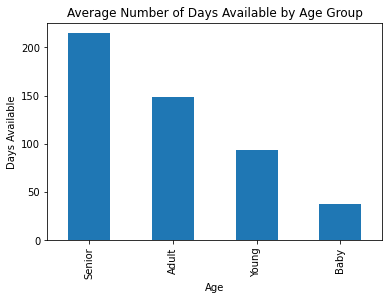

In [22]:
#Generate a bar plot showing the days vs avg size
total_days = dogs_df.groupby(['Age'])['Days Available'].mean()
bar_plot = total_days.sort_values(ascending=False).plot(kind='bar')

# Set the xlabel, ylabel, and title
bar_plot.set_ylabel("Days Available")
bar_plot.set_title("Average Number of Days Available by Age Group")

plt.savefig("Figures/bar_dog_age_all.png")
plt.show()

In [23]:
#Generate a box plot showing the days vs size
avg_days_age = []

age_list = ['Senior', 'Adult','Young','Baby']

for each in age_list:
    #use loc to find the rows corresponding to each
    days = dogs_df.loc[dogs_df['Age']==each]['Days Available']
    avg_days_age.append(days)
    print(each)

Senior
Adult
Young
Baby


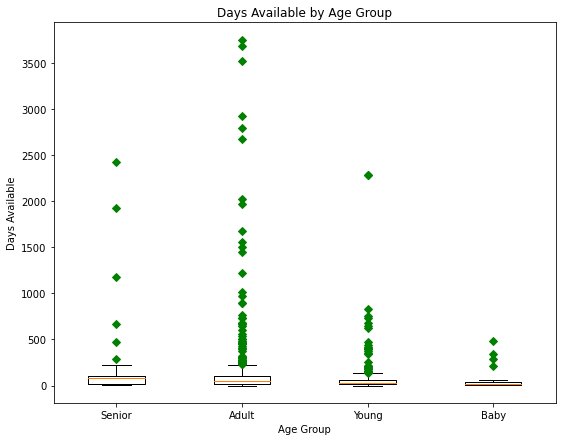

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Days Available by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Days Available')
ax.boxplot(avg_days_age,notch=0,sym='gD')
plt.xticks([1,2,3,4],age_list)

# Save the figure

plt.savefig("Figures/box_dog_age_all.png")
plt.show()

There are only 44 dogs that are considered senior dogs. Considering this group on its own could skew the data. Therefore, the team grouped dogs as Adult (Senior and Adult) vs Young (Young and Baby) to get more comparable sample sizes of each group. 

In [25]:
#Modify grouping lists to be either big (Extra large and Large) or small (Medium and Small).

#create a new dataframe for dogs_df
dogs_df_age = dogs_df

age_group_df ={
    "Senior":"Adult",
    "Adult": "Adult",
    "Young":"Young",
    "Baby":"Young"
}

dogs_df_age['Age_Group']=dogs_df_age['Age'].map(age_group_df)
dogs_df_age

,Pet ID,Name,Status,Publish Date,Organization ID,City,State,Breed,Age,Gender,Size,Spayed or Neutered,House Trained,Special Needs,Shots Current,Date Collected,Days Available,Group,Age_Group
0,54858447,Boon,adoptable,2022-03-04,GA862,Athens,GA,Mixed Breed,Adult,Male,Large,True,False,False,False,2022-04-26,53,Big,Adult
1,54802620,Casper,adoptable,2022-03-01,GA99,Macon,GA,Mixed Breed,Young,Male,Medium,True,False,False,False,2022-04-26,56,Small,Young
2,55368350,Giacomo (In Foster),adoptable,2022-04-22,GA335,Atlanta,GA,Mixed Breed,Young,Male,Small,True,False,False,False,2022-04-26,4,Small,Young
3,55179362,Loki,adoptable,2022-04-01,GA340,Tucker,GA,Labrador Retriever,Adult,Male,Large,True,True,True,True,2022-04-26,25,Big,Adult
4,55331643,Queen,adoptable,2022-04-18,GA217,Atlanta,GA,Pit Bull Terrier,Young,Female,Medium,False,False,False,False,2022-04-26,8,Small,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,54255555,Aphrodite- In Foster,adoptable,2022-01-16,GA423,Chamblee,GA,Mixed Breed,Adult,Female,Large,True,False,False,False,2022-04-26,100,Big,Adult
828,55192469,Stuart Wiggle,adoptable,2022-04-03,GA217,Atlanta,GA,Black Mouth Cur,Baby,Male,Small,True,False,False,False,2022-04-26,23,Small,Young
829,55304165,Chica,adoptable,2022-04-14,GA862,Athens,GA,Mixed Breed,Young,Female,Medium,False,False,False,False,2022-04-26,12,Small,Young
830,55304095,Lana,adoptable,2022-04-14,GA862,Athens,GA,Mixed Breed,Adult,Female,Large,False,False,False,False,2022-04-26,12,Big,Adult


In [30]:
#Using the aggregation method, look at average with new grouping 
new_stats_age = dogs_df_age.groupby(['Age_Group'])['Days Available'].agg(['mean', 'median', 'var', 'std','sem'])
new_stats_age

,mean,median,var,std,sem
Age_Group,,,,,
Adult,154.092764,46.0,178438.035988,422.419266,18.194886
Young,80.399317,26.0,49454.144794,222.382879,12.991746


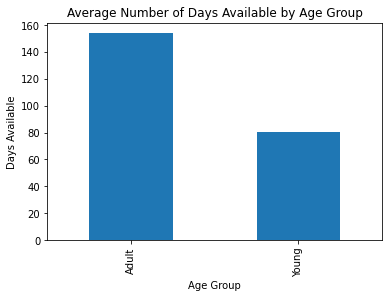

In [27]:
#Generate a bar plot showing the days vs avg size
total_days_age = dogs_df_age.groupby(['Age_Group'])['Days Available'].mean()
bar_plot = total_days_age.sort_values(ascending=False).plot(kind='bar')

# Set the xlabel, ylabel, and title
bar_plot.set_ylabel("Days Available")
bar_plot.set_xlabel("Age Group")
bar_plot.set_title("Average Number of Days Available by Age Group")

plt.savefig("Figures/bar_dog_age_grouped.png")
plt.show()

In [28]:
#Generate a box plot showing the days vs age
avg_days_age = []

age_list = ['Adult','Young']

for each in age_list:
    #use loc to find the rows corresponding to each
    days = dogs_df.loc[dogs_df['Age']==each]['Days Available']
    avg_days_age.append(days)
    print(each)

Adult
Young


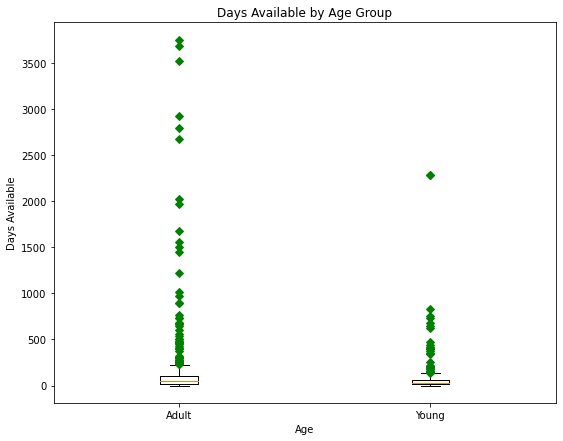

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Days Available by Age Group')
ax.set_xlabel('Age')
ax.set_ylabel('Days Available')
ax.boxplot(avg_days_age,notch=0,sym='gD')
plt.xticks([1,2],age_list)

# Save the figure
plt.savefig("Figures/box_dog_age_grouped.png")
plt.show()

# Age Results
* Adult dogs, grouped as Senior or Adult dogs, spend on average 154 days on Petfinder. 
* Young dogs, grouped as medium or small dogs, spend on average 80 days on Petfinder.
* We reject the null hypothesis in favor of alternative hypothesis 1, that adult dogs spend more time on average on Petfinder than young dogs.
* There were 539 adult dogs and 239 young dogs considered in this data analysis.

# Location
Q4: Do dogs spend more time on average on Petfinder inside the perimeter of Atlanta cities or outside the perimeter of Atlanta?
* H4_o: Dogs based inside the perimeter of Atlanta spend on average the same amount of time on Petfinder than dogs that are outside the perimeter of Atlanta.
* H4_1a: Dogs based inside the perimeter of Atlanta cities spend more time on average on Petfinder than dogs based outside the perimeter of Atlanta.
* H4_2a: Dogs based inside the perimeter of Atlanta cities spend less time on average on Petfinder than dogs based outside the perimeter of Atlanta.

In [28]:
#Look at distribution of dog locations
dogs_df['City'].value_counts()

Atlanta          192
Chamblee         160
Lawrenceville     45
Albany            36
Tyrone            32
                ... 
Bogart             1
Mcdonough          1
Jonesboro          1
Griffin            1
Sharpsburg         1
Name: City, Length: 63, dtype: int64

In [29]:
#Using the aggregation method, look at average 
initial_stats = dogs_df.groupby(['City'])['Days Available'].agg(['mean', 'median', 'var', 'std','sem'])
initial_stats

,mean,median,var,std,sem
City,,,,,
Albany,35.916667,38.0,128.764286,11.347435,1.891239
Alpharetta,77.000000,77.0,NaN,NaN,NaN
Appling,37.000000,42.0,517.000000,22.737634,8.594018
Athens,62.764706,14.0,5672.066176,75.313121,18.266115
Atlanta,99.088542,26.0,130256.751282,360.911002,26.046508
...,...,...,...,...,...
Tyrone,40.500000,29.5,2051.935484,45.298294,8.007683
Warner Robins,53.812500,2.0,11434.695833,106.933137,26.733284
Washington,83.300000,53.0,6010.900000,77.529994,24.517137


In [30]:
#Modify grouping lists to be either ITP (in the perimeter) or not.
#cities inside the perimeter of Atlanta

itp_atlanta = ["Atlanta","East Point", "College Park", 
                 "Hapeville", "Decatur","Belvedere Park","Chamblee","Doraville",
                 "Panthersville","Candler-McAfee", "Scottsdale",
                 "North Decatur","North Druid Hills","Brookhaven","Vinings"]
itp_cities = []
for city in dogs_df['City']:
    
    if city in itp_atlanta:
        itp_cities.append("ITP")
    else: 
        itp_cities.append("OTP")
dogs_df['Location'] = itp_cities
dogs_df.head()

,Pet ID,Name,Status,Publish Date,Organization ID,City,State,Breed,Age,Gender,Size,Spayed or Neutered,House Trained,Special Needs,Shots Current,Date Collected,Days Available,Group,Age_Group,Location
0,54858447,Boon,adoptable,2022-03-04,GA862,Athens,GA,Mixed Breed,Adult,Male,Large,True,False,False,False,2022-04-26,53,Big,Adult,OTP
1,54802620,Casper,adoptable,2022-03-01,GA99,Macon,GA,Mixed Breed,Young,Male,Medium,True,False,False,False,2022-04-26,56,Small,Young,OTP
2,55368350,Giacomo (In Foster),adoptable,2022-04-22,GA335,Atlanta,GA,Mixed Breed,Young,Male,Small,True,False,False,False,2022-04-26,4,Small,Young,ITP
3,55179362,Loki,adoptable,2022-04-01,GA340,Tucker,GA,Labrador Retriever,Adult,Male,Large,True,True,True,True,2022-04-26,25,Big,Adult,OTP
4,55331643,Queen,adoptable,2022-04-18,GA217,Atlanta,GA,Pit Bull Terrier,Young,Female,Medium,False,False,False,False,2022-04-26,8,Small,Young,ITP


In [31]:
dogs_df['Location'].value_counts()

OTP    449
ITP    383
Name: Location, dtype: int64

In [32]:
#Using the aggregation method, look at average 
ITP_stats = dogs_df.groupby(['Location'])['Days Available'].agg(['mean', 'median', 'var', 'std','sem'])
ITP_stats

,mean,median,var,std,sem
Location,,,,,
ITP,99.140992,39.0,84701.681640,291.035533,14.871221
OTP,152.877506,38.0,175263.897908,418.645313,19.757094


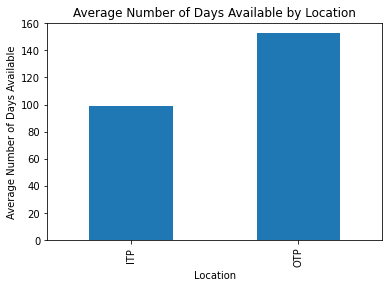

In [33]:
#Generate a bar plot showing the days vs location
total_days = dogs_df.groupby(['Location'])['Days Available'].mean()
bar_plot = total_days.sort_values(ascending=True).plot(kind='bar')

# Set the xlabel, ylabel, and title
bar_plot.set_ylabel("Average Number of Days Available")
bar_plot.set_xlabel("Location")
bar_plot.set_title("Average Number of Days Available by Location")

plt.savefig("Figures/bar_dog_city_grouped.png")
plt.show()

In [34]:
#Generate a box plot showing the days vs age
avg_days_city = []

location_list = ['ITP','OTP']

for each in location_list:
    #use loc to find the rows corresponding to each
    days = dogs_df.loc[dogs_df['Location']==each]['Days Available']
    avg_days_city.append(days)
    print(each)

ITP
OTP


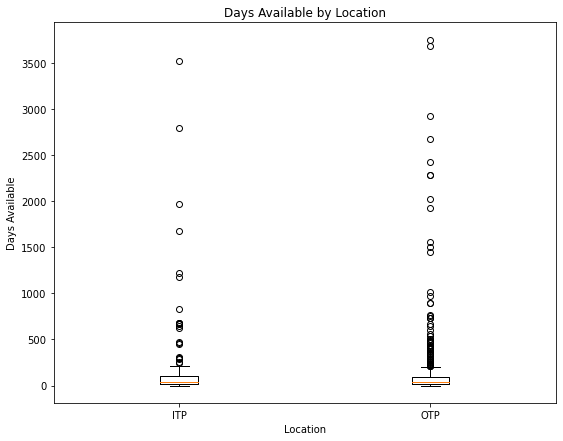

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Days Available by Location')
ax.set_xlabel('Location')
ax.set_ylabel('Days Available')
ax.boxplot(avg_days_city)
plt.xticks([1,2],location_list)

# Save the figure
plt.savefig("Figures/box_dog_city_grouped.png")
plt.show()

# Location Results
* Dogs located inside the perimeter of Atlanta spend on average 99 days on Petfinder. 
* Dogs located outside the perimeter of Atlanta spend on average 153 days on Petfinder. 
* We reject the null hypothesis in favor of alternative hypothesis 2, that dogs based inside the perimeter of Atlanta spend more time on average on Petfinder than dogs based outside the Perimeter of Atlanta.
* There were 449 dogs and 383 young dogs considered in this data analysis.